In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<AxesSubplot:xlabel='label', ylabel='count'>

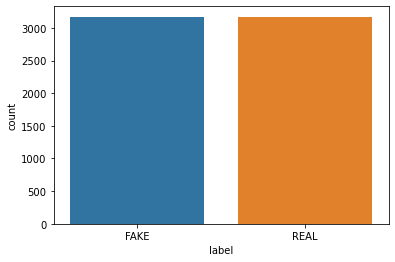

In [4]:
sns.countplot(data=df,x='label')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
X = df['text']
y = df['label']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words='english')

In [13]:
X_train = tfidf.fit_transform(X_train)

In [14]:
X_test = tfidf.transform(X_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,y_train)

LinearSVC()

In [19]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [20]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)

NB MODEL
              precision    recall  f1-score   support

        FAKE       0.97      0.71      0.82       943
        REAL       0.78      0.98      0.87       958

    accuracy                           0.85      1901
   macro avg       0.87      0.85      0.84      1901
weighted avg       0.87      0.85      0.85      1901



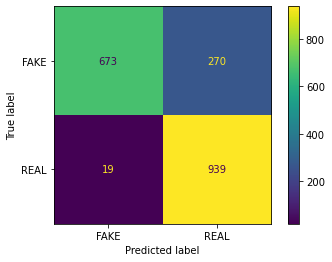

In [21]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

        FAKE       0.88      0.95      0.92       943
        REAL       0.94      0.88      0.91       958

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



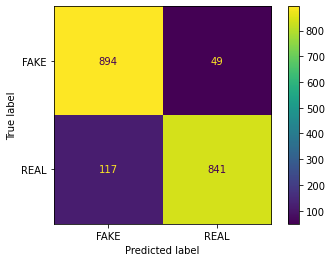

In [22]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.94       943
        REAL       0.95      0.92      0.93       958

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



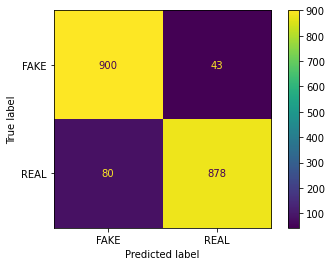

In [23]:
print('SVC')
report(svc)

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [26]:
pipe.fit(df['text'],df['label'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])